## DTS 305 
**Name:** Solomon Ayuba **Date:** Saturday, 29th March 2025



## Part 2: Web Scraping and Feature Engineering

**Tasks:** Using the provided URL (http://books.toscrape.com/)
- Use requests and BeautifulSoup to scrape Title, Price, Rating, Availability status for all books on the homepage
- Save the extracted data into a pandas DataFrame and export it as a CSV file.
- Clean the data:
    - Convert prices from strings to numerical values (remove symbols like £).
    - Map the ratings (e.g., "Three" = 3, "Five" = 5) to numerical values.

**Feature Engineering:**
- Create a new column categorizing books as "Affordable" (price < £20) or "Expensive" (price ≥ £20).
- Calculate the average rating for "Affordable" vs. "Expensive" books.
- Visualize the data:
    - Create a pie chart showing the proportion of affordable vs expensive books.
    - Plot a bar chart of average ratings by category (Affordable vs Expensive).

**Deliverables:**
- The final CSV file containing the scraped data.
- A Jupyter Notebook with the Python code and a step-by-step explanation.
- At least two visualisations (e.g., a pie chart for affordability, bar chart for ratings).

# Practical Section - Part 2

In [2]:
# importing the required libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### Task 1: Use requests and BeautifulSoup to scrape Title, Price, Rating, Availability status for all books on the homepage

In [722]:
# Step 1: Send an HTTP GET request to fetch the webpage

url = 'http://books.toscrape.com/' # URL of the webpage
response = requests.get(url) # Accessing the webpage

# Step 2: Check if the request was successful

if response.status_code == 200:
    print("Page successfully retrieved")
else:
    print(f"Failed to retrieve the page: Status code {response.status_code}")

Page successfully retrieved


In [723]:
# Step 3: Parse the HTML content using Beautifulsoup

soup = BeautifulSoup(response.content, 'html.parser')
soup

print(soup.prettify()) # Print prettified HTML
# print(soup.find('article', class_='product_pod').prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

In [724]:
# Step 4: Find the div containing the Title, Price, Rating, Availability status for all books on the homepage

book_details = soup.find_all('article', class_='product_pod')
print(f"Found {len(book_details)} book containers\n\n{book_details}") 

Found 20 book containers

[<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>, <article class="product_pod">
<div class="image_container">
<a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thum

In [725]:
# Step 5: Extract the required details from each book div

book_data = []
for book in book_details:
    # Extract title (from <h3><a> tag's 'title' attribute)
    title = book.h3.a['title']
    
    # Extract price (from <p class="price_color">)
    price = book.find('p', class_='price_color').text
    
    # Extract rating (from <p class="star-rating [One-Five]">)
    rating_class = [c for c in book.p['class'] if c != 'star-rating'][0]
    #Map the ratings (e.g., "Three" = 3, "Five" = 5) to numerical values.
    rating = {
         'One': '1', 
         'Two': '2', 
         'Three': '3',
         'Four': '4', 
         'Five': '5'
    }.get(rating_class, 'N/A')
    
    # Extract availability (from <p class="instock availability">)
    availability = book.find('p', class_='instock availability').text.strip()
    
    book_data.append({
        'Title': title,
        'Price': price,
        'Rating': rating,
        'Availability': availability
    })

# Print all books
for idx, book in enumerate(book_data, 1):
    print(f"{idx}. {book}")

print(f"\nTotal Books Extracted: {len(book_data)}")

1. {'Title': 'A Light in the Attic', 'Price': '£51.77', 'Rating': '3', 'Availability': 'In stock'}
2. {'Title': 'Tipping the Velvet', 'Price': '£53.74', 'Rating': '1', 'Availability': 'In stock'}
3. {'Title': 'Soumission', 'Price': '£50.10', 'Rating': '1', 'Availability': 'In stock'}
4. {'Title': 'Sharp Objects', 'Price': '£47.82', 'Rating': '4', 'Availability': 'In stock'}
5. {'Title': 'Sapiens: A Brief History of Humankind', 'Price': '£54.23', 'Rating': '5', 'Availability': 'In stock'}
6. {'Title': 'The Requiem Red', 'Price': '£22.65', 'Rating': '1', 'Availability': 'In stock'}
7. {'Title': 'The Dirty Little Secrets of Getting Your Dream Job', 'Price': '£33.34', 'Rating': '4', 'Availability': 'In stock'}
8. {'Title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'Price': '£17.93', 'Rating': '3', 'Availability': 'In stock'}
9. {'Title': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'Price'

In [726]:
#Step 7: Create a pandas dataframe

df = pd.DataFrame(book_data)
df

,Title,Price,Rating,Availability
0,A Light in the Attic,£51.77,3,In stock
1,Tipping the Velvet,£53.74,1,In stock
2,Soumission,£50.10,1,In stock
3,Sharp Objects,£47.82,4,In stock
4,Sapiens: A Brief History of Humankind,£54.23,5,In stock
5,The Requiem Red,£22.65,1,In stock
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,4,In stock
7,The Coming Woman: A Novel Based on the Life of...,£17.93,3,In stock
8,The Boys in the Boat: Nine Americans and Their...,£22.60,4,In stock
9,The Black Maria,£52.15,1,In stock


### Task 2: Save the extracted data into a pandas DataFrame and export it as a CSV file.

In [728]:
# Saving to the current working directory

df.to_csv('part2_books_toscrape.csv', index=False)
print("FILE SAVED as: 'books_toscrape.csv'")

# Verifying Export
print(f"\nFILE SAVED SUCCESSFULLY ✅ \n\nFILE PATH: \n{os.path.abspath('part2_books_toscrape.csv')}")



FILE SAVED as: 'books_toscrape.csv'

FILE SAVED SUCCESSFULLY ✅ 

FILE PATH: 
/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/part2_books_toscrape.csv


### Task 3: Clean the data:
- Convert prices from strings to numerical values (remove symbols like £)

In [730]:
# Convert prices from strings to numerical values (remove symbols like £)

df['Price'] = df['Price'].str.replace('£', '').astype(float)
df

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock
5,The Requiem Red,22.65,1,In stock
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4,In stock
7,The Coming Woman: A Novel Based on the Life of...,17.93,3,In stock
8,The Boys in the Boat: Nine Americans and Their...,22.60,4,In stock
9,The Black Maria,52.15,1,In stock


## Feature Engineering

### Task 1: Create a new column categorizing books as "Affordable" (price < £20) or "Expensive" (price ≥ £20).

In [732]:
# Using Numpy np.where for simple binary condition

df['Price Category'] = np.where(df['Price'] < 20, 'Affordable', 'Expensive')
df.head()

,Title,Price,Rating,Availability,Price Category
0,A Light in the Attic,51.77,3,In stock,Expensive
1,Tipping the Velvet,53.74,1,In stock,Expensive
2,Soumission,50.10,1,In stock,Expensive
3,Sharp Objects,47.82,4,In stock,Expensive
4,Sapiens: A Brief History of Humankind,54.23,5,In stock,Expensive


In [738]:
# Saving the updated file to the current working directory

df.to_csv('part2_updated_books_toscrape.csv', index=False)
print("FILE SAVED as: 'books_toscrape.csv'")

# Verifying Export
print(f"\nFILE SAVED SUCCESSFULLY ✅ \n\nFILE PATH: \n{os.path.abspath('part2_updated_books_toscrape.csv')}")



FILE SAVED as: 'books_toscrape.csv'

FILE SAVED SUCCESSFULLY ✅ 

FILE PATH: 
/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/part2_updated_books_toscrape.csv


### Task 2: Calculate the average rating for "Affordable" vs. "Expensive" books.

In [744]:
# Convert Rating to numeric first

df['Rating'] = df['Rating'].astype(float)

# Calculate Average Rating by Price Category('Affordable' vs 'Expensive' books)
average_rating = df.groupby('Price Category')['Rating'].agg(['count', 'mean']).round(2)
average_rating

,count,mean
Price Category,,
Affordable,3,3.33
Expensive,17,2.76


###  Task 3: Visualise the data
 - Create a pie chart showing the proportion of affordable vs. expensive books.
 - Plot a bar chart of average ratings by category (Affordable vs. Expensive).

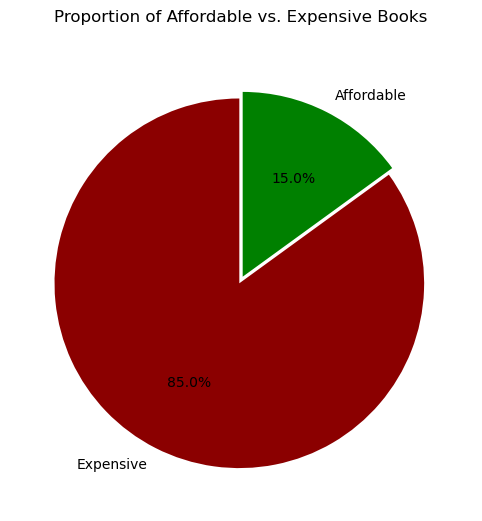


FILE SAVED SUCCESSFULLY ✅ 

FILE PATH: 
/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/Part2_proportion_of_price-category.png


In [747]:
# Creating a pie chart

# Count books in each category
price_category_count = df['Price Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    price_category_count,
    labels=price_category_count.index,
    autopct='%1.1f%%',
    colors=['#8B0000', '#008000'],  # Green for Affordable, Maroon for Expensive
    startangle=90,
    explode=(0.02, 0.02)  # Slightly separate slices
)

plt.title('Proportion of Affordable vs. Expensive Books', pad=20)

# Saving the pie chart
plt.savefig('Part2_proportion_of_price-category.png', 
            dpi=300, 
            bbox_inches='tight', 
            transparent=False)

# Displays the plot
plt.show()  

# Verifying the file saved
print(f"\nFILE SAVED SUCCESSFULLY ✅ \n\nFILE PATH: \n{os.path.abspath('Part2_proportion_of_price-category.png')}")

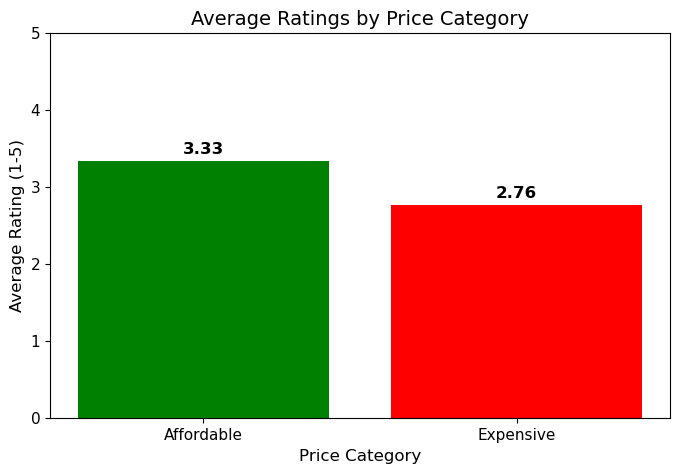


FILE SAVED SUCCESSFULLY ✅ 

FILE PATH: 
/Users/solomonayuba/Documents/Docs/School /Miva Open University/Data Science Program/300 Level/DTS 305 – 3 – Data Quality and Data Wrangling /LAB/Part2_average_rating_by_price_categoryII.png


In [757]:
# Ploting a bar chart for average ratings by price category
plt.figure(figsize=(8, 5))
plt.bar(average_rating.index, average_rating['mean'], color=['green', 'red'])

# Adding titles and labels
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Average Rating (1-5)", fontsize=12)
plt.title("Average Ratings by Price Category", fontsize=14)
plt.ylim(0, 5)  # Ratings are between 1 and 5
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Showing values on top of bars
for i, val in enumerate(average_rating['mean']):
    plt.text(i, val + 0.1, str(val), ha='center', fontsize=12, fontweight='bold')

# Saving the pie chart
plt.savefig('Part2_average_rating_by_price_categoryII.png', 
            dpi=300, 
            bbox_inches='tight', 
            transparent=False)

# Displays the plot
plt.show()  

# Verifying the file saved
print(f"\nFILE SAVED SUCCESSFULLY ✅ \n\nFILE PATH: \n{os.path.abspath('Part2_average_rating_by_price_categoryII.png')}")